In [17]:
import numpy as np
import matplotlib.pyplot as plt
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy

In [18]:
def learning_algorithm(maze, number_of_episodes = 50, max_steps = 30000, epsilon = 0.1, alfa = 0.7, gamma = 0.9):
    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()


    # Set algorithm parameters
    # number_of_episodes = 50
    # max_steps = 30000
    # epsilon = 0.1
    # alfa = 0.7
    # gamma = 0.9
    action_list_all = []
    def cycle():
        """
        A method that simulates one cycle/episode of the robot
        It stops when it makes at most 30000 steps or when it reaches the goal
        :return:
        """
        end_cycle = False
        step = 0
        action_list = []
        while not end_cycle:
            # Select an action
            action = selection.get_egreedy_action(robot, maze, learn, epsilon)
            action_list.append(action)
            # get current state
            current_state = robot.get_state(maze)
            # do the step
            robot.do_action(action, maze)
            # get new state
            state_next = robot.get_state(maze)
            # get reward from the action
            reward = maze.get_reward(state_next)
            # get possible actions
            possible_actions = maze.get_valid_actions(robot)
            # update the Q-table (Q(s, a))
            learn.update_q(current_state, action, reward, state_next, possible_actions, alfa, gamma)

            # increase the step counter
            step += 1
            if step == max_steps or robot.get_state(maze) == maze.get_state(9, 9):
                end_cycle = True
                num_of_steps.append(robot.nr_of_actions_since_reset)
                robot.reset()
        action_list_all.append(action_list)

    # keep learning until you decide to stop
    stop = False
    episode = 1
    num_of_steps = []
    while not stop:

        # run a cycle
        # TODO implement the action selection and learning cycle
        cycle()

        # TODO figure out a stopping criterion
        # stop when we reach number_of_episodes
        episode += 1
        if episode > number_of_episodes:
            stop = True
    # Return list with the number of steps each cycle took
    # And list of actions in each cycle (disclaimer: printing might cause fatal error for your machine)
    return num_of_steps, action_list_all

In [19]:
# Run everything num times
num = 1

# Load the maze
file = "../data/toy_maze.txt"
maze_toy = Maze(file)

# Set the reward at the bottom right to 10
maze_toy.set_reward(maze_toy.get_state(9, 9), 10)
toy_data = []
toy_action_list = []
for i in range(num):
    num_list, action_list = learning_algorithm(maze_toy)
    toy_data.append(num_list)
    toy_action_list.append(action_list)

# Load the maze
file = "../data/easy_maze.txt"
maze_easy = Maze(file)

# I've also tried setting weight to -1 for all the other fields but it still sometime goes to max_steps

# Set the reward at the bottom right to 10
maze_easy.set_reward(maze_easy.get_state(24, 14), 10)
easy_data = []
easy_action_list = []
for i in range(num):
    num_list, action_list = learning_algorithm(maze_easy, max_steps=100000, number_of_episodes=50)
    easy_data.append(num_list)
    easy_action_list.append(action_list)


Ready reading maze file ../data/toy_maze.txt
Made EGreedy
622
1098
1090
1990
304
500
94
232
230
300
194
78
250
282
310
444
96
142
188
378
28
74
30
38
50
32
26
28
28
32
24
26
24
26
26
28
28
24
28
32
26
26
26
30
26
28
30
26
26
26
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
3790
100000
512
100000
92
814
740
208
272
102
284
238
974
178
4248
1874
100000
100000
100000
302
1672
178
100000
338
340
2120
1722
128
100000
3644
70
298
990
100000
100000
2732
242
100000
1380
100000
242
100000
724
132
100000
100000
100000
1072
100000
958


In [20]:
print(toy_data)
print(easy_data)

[[622, 1098, 1090, 1990, 304, 500, 94, 232, 230, 300, 194, 78, 250, 282, 310, 444, 96, 142, 188, 378, 28, 74, 30, 38, 50, 32, 26, 28, 28, 32, 24, 26, 24, 26, 26, 28, 28, 24, 28, 32, 26, 26, 26, 30, 26, 28, 30, 26, 26, 26]]
[[3790, 100000, 512, 100000, 92, 814, 740, 208, 272, 102, 284, 238, 974, 178, 4248, 1874, 100000, 100000, 100000, 302, 1672, 178, 100000, 338, 340, 2120, 1722, 128, 100000, 3644, 70, 298, 990, 100000, 100000, 2732, 242, 100000, 1380, 100000, 242, 100000, 724, 132, 100000, 100000, 100000, 1072, 100000, 958]]


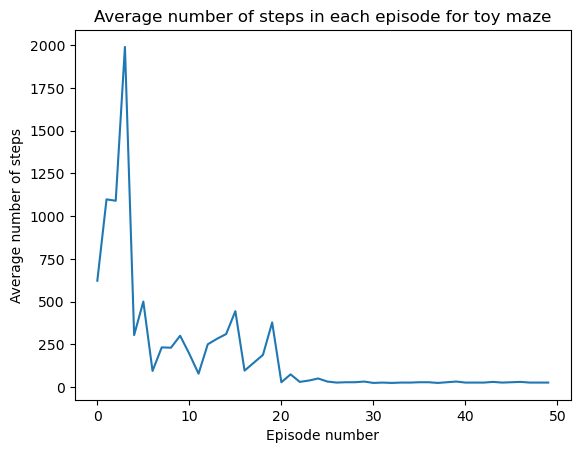

In [21]:
plt.plot(np.average(toy_data, axis=0))
plt.title("Average number of steps in each episode for toy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()

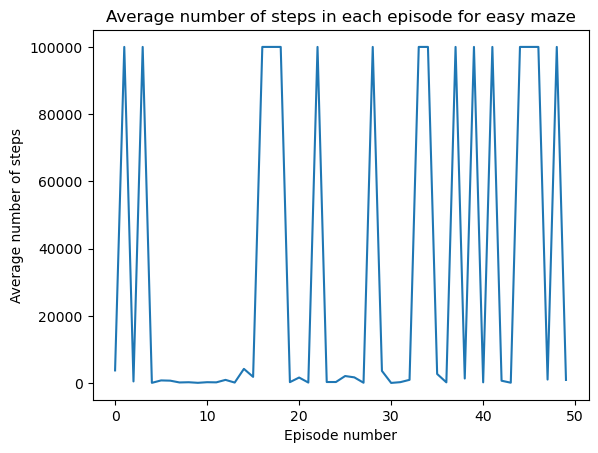

In [22]:
plt.plot(np.average(easy_data, axis=0))
plt.title("Average number of steps in each episode for easy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()
# This bad boy keeps looping sometimes, getting the max steps